# Step1: Getting data 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Preparing data paths
train_dir = 'Training'
test_dir = 'Testing'
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']


# Step2: Data Preprocessing


In [2]:
# Loading Images and Preprocessing
def load_data(data_dir):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                img_array = cv2.resize(img_array, (128, 128)) # Resizing Images
                images.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(images), np.array(labels)

In [3]:
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

# Normalization of data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Converting labels with one-hot encoding
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# Testing and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



# Step3: Creating Convolutional Neural Networks Model

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [5]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - accuracy: 0.5506 - loss: 0.9805 - val_accuracy: 0.8338 - val_loss: 0.4482
Epoch 2/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 27s 189ms/step - accuracy: 0.8139 - loss: 0.4927 - val_accuracy: 0.8556 - val_loss: 0.3851
Epoch 3/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 196ms/step - accuracy: 0.8640 - loss: 0.3594 - val_accuracy: 0.8994 - val_loss: 0.2757
Epoch 4/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 200ms/step - accuracy: 0.8938 - loss: 0.2732 - val_accuracy: 0.8933 - val_loss: 0.2921
Epoch 5/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 203ms/step - accuracy: 0.9168 - loss: 0.2173 - val_accuracy: 0.9143 - val_loss: 0.2495
Epoch 6/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 202ms/step - accuracy: 0.9338 - loss: 0.1744 - val_accuracy: 0.9265 - val_loss: 0.2035
Epoch 7/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9444 - loss: 0.1328 - val_accuracy: 0.9318 - val_loss: 0.1989
Epoch 8/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.9625 - loss: 0

# Step5: Model Evaluation

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


41/41 - 2s - 44ms/step - accuracy: 0.9573 - loss: 0.2385
Test accuracy: 0.9572845101356506


# Step6: Visualizing Training Results

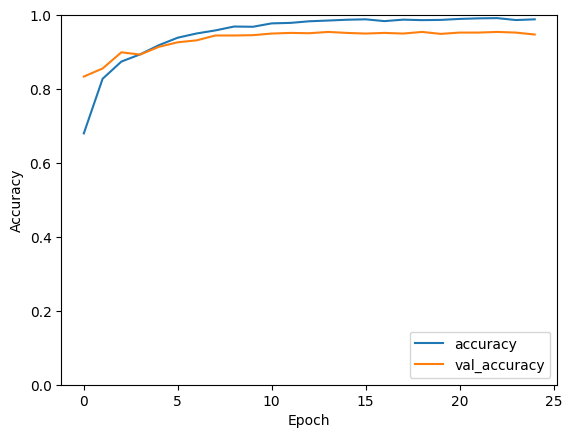

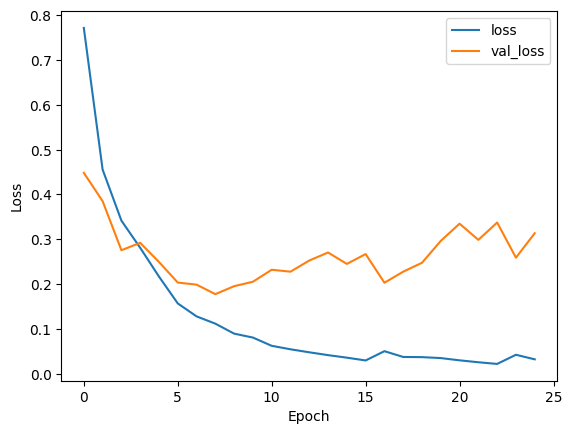

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [8]:
model.save('brain_tumor_detection_model.keras')


# Step7: Brain Tumor Prediction Based on The Model

In [41]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Loading the Model
model = load_model('brain_tumor_detection_model.keras')


## Step7.1: Preparing New Image to Test

In [42]:
# Loading and preparing new image
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, (128, 128)) # Modelin beklediği boyut
    img_array = np.array(img_array) / 255.0 # Normalizasyon
    img_array = img_array.reshape(-1, 128, 128, 3) # Modelin beklediği şekil
    return img_array

# Example image path
image_path = 'Testing/glioma/Te-gl_0013.jpg'
prepared_image = prepare_image(image_path)


# Step7.2: Predicting Step

In [43]:

# Making predictions
predictions = model.predict(prepared_image)
predicted_class = np.argmax(predictions, axis=1)

# Reviewing results
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
print(f'Tahmin edilen sınıf: {class_names[predicted_class[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Tahmin edilen sınıf: glioma


## Step7.3: Predicting Many Images at Once

In [44]:
import os
import random
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Setting up paths
test_dir = 'Testing/'
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']



## Step7.3.1: Random Image Selection and Preparation

In [45]:
# Selecting 10 random images
def select_random_images(test_dir, categories, num_images=10):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(test_dir, category)
        class_num = categories.index(category)
        images_in_category = os.listdir(path)
        random_images = random.sample(images_in_category, num_images // len(categories))
        for img in random_images:
            img_path = os.path.join(path, img)
            images.append(img_path)
            labels.append(class_num)
    
    # If have not been yet 10 images, completing it 
    remaining = num_images - len(images)
    if remaining > 0:
        additional_images = random.choices(images_in_category, k=remaining)
        for img in additional_images:
            img_path = os.path.join(path, img)
            images.append(img_path)
            labels.append(class_num)

    return images, labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Image: Testing/glioma/Te-gl_0109.jpg, Real: glioma, Predicted: glioma
Image: Testing/glioma/Te-gl_0203.jpg, Real: glioma, Predicted: glioma
Image: Testing/meningioma/Te-me_0221.jpg, Real: meningioma, Predicted: meningioma
Image: Testing/meningioma/Te-me_0124.jpg, Real: meningioma, Predicted: meningioma
Image: Testing/notumor/Te-no_0259.jpg, Real: notumor, Predicted: notumor
Image: Testing/notumor/Te-no_0161.jpg, Real: notumor, Predicted: notumor
Image: Testing/pituitary/Te-pi_0298.jpg, Real: pituitary, Predicted: pituitary
Image: Testing/pituitary/Te-pi_0068.jpg, Real: pituitary, Predicted: pituitary
Image: Testi

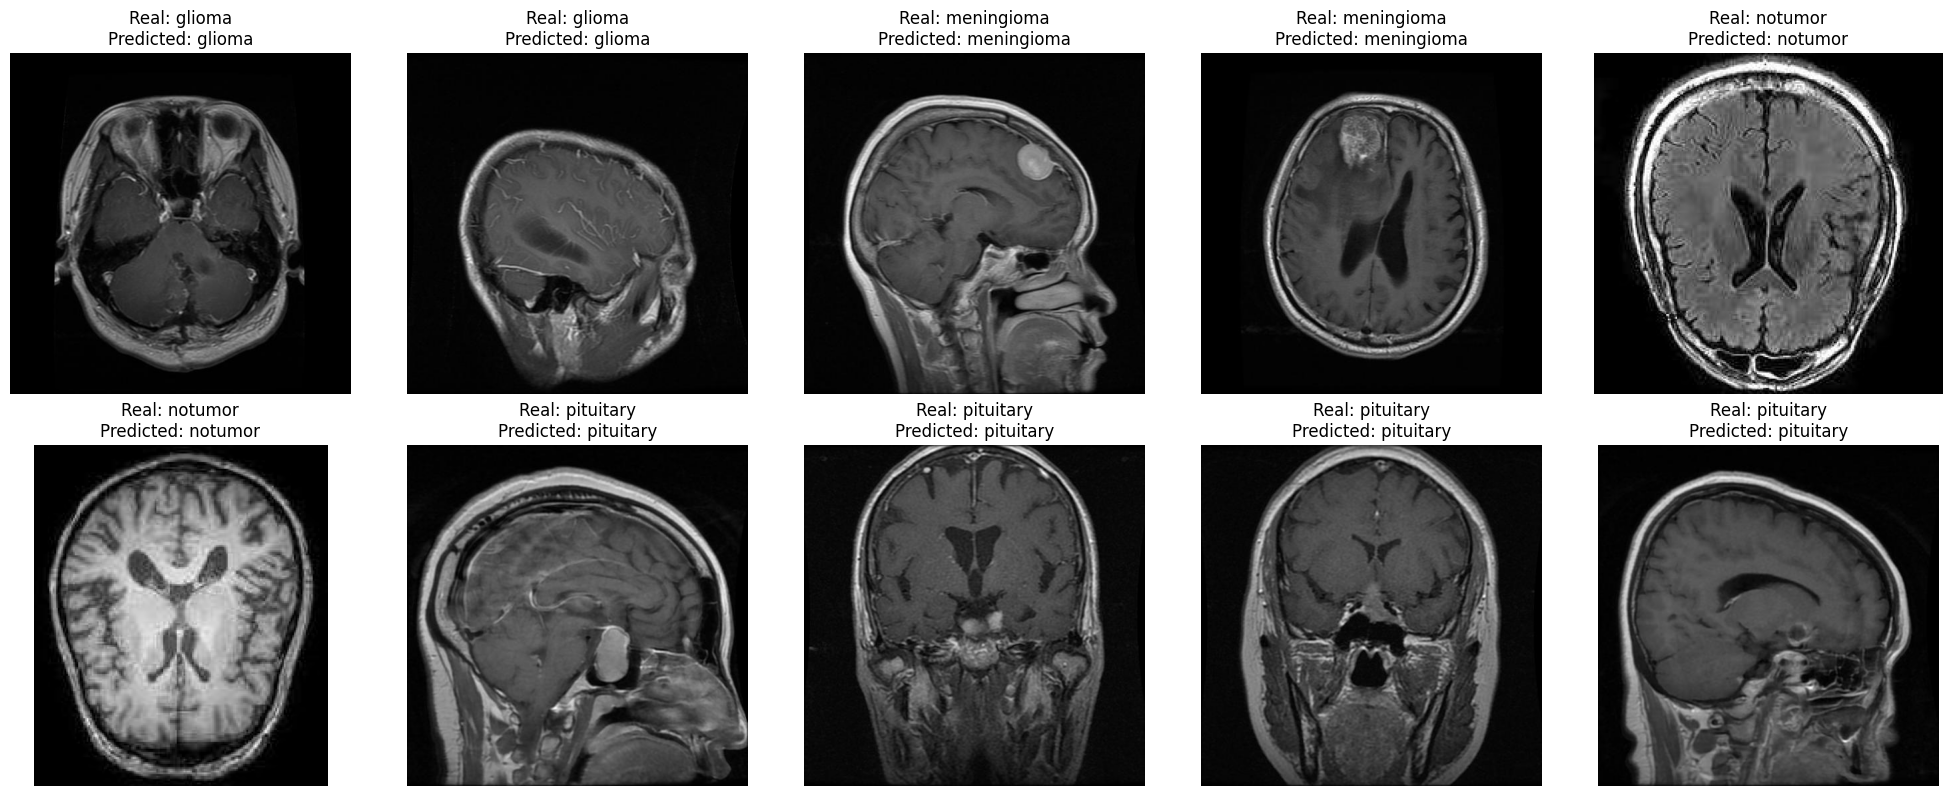

In [46]:
# Preparing Images
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, (128, 128)) # Modelin beklediği boyut
    img_array = np.array(img_array) / 255.0 # Normalizasyon
    img_array = img_array.reshape(-1, 128, 128, 3) # Modelin beklediği şekil
    return img_array
# Selecting random images and preparation 
random_images, labels = select_random_images(test_dir, categories, num_images=10)
prepared_images = [prepare_image(img) for img in random_images]

# Predictions with The Model
predictions = [model.predict(image) for image in prepared_images]
predicted_classes = [np.argmax(prediction, axis=1)[0] for prediction in predictions]

# Printing the Results
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

for i, img_path in enumerate(random_images):
    print(f'Image: {img_path}, Real: {class_names[labels[i]]}, Predicted: {class_names[predicted_classes[i]]}')

# Visualizing the Results
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for img, ax, label, pred in zip(random_images, axes, labels, predicted_classes):
    img_array = cv2.imread(img)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    ax.imshow(img_array)
    ax.set_title(f'Real: {class_names[label]}\nPredicted: {class_names[pred]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions on testing data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculating Precision, recall and F1-score 
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Printing Results
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-score: {f1[i]}")
    print()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
Class: glioma
Precision: 0.9851301115241635
Recall: 0.8833333333333333
F1-score: 0.9314586994727593

Class: meningioma
Precision: 0.8888888888888888
Recall: 0.9411764705882353
F1-score: 0.9142857142857143

Class: notumor
Precision: 0.9782082324455206
Recall: 0.9975308641975309
F1-score: 0.9877750611246944

Class: pituitary
Precision: 0.9770491803278688
Recall: 0.9933333333333333
F1-score: 0.9851239669421488



In [3]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Loading the Model
model = load_model('brain_tumor_detection_model.keras')

## Step8: Data Augmentation Step

In [4]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Loading Training and testing data and Data Preprocessing
train_dir = 'Training/'
test_dir = 'Testing/'
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Loading and Labeling Images
def load_data(data_dir):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                img_array = cv2.resize(img_array, (128, 128))  # Resimleri yeniden boyutlandırma
                images.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(images), np.array(labels)

X, y = load_data(train_dir)
y = to_categorical(y, num_classes=len(categories))

# Testing and validating
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [5]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


## Step9: Training new Model

In [7]:
import warnings
import logging
import tensorflow as tf

# Ignoring warnings
warnings.filterwarnings('ignore')

# Ignoring Tensorflow warnings
tf.get_logger().setLevel(logging.ERROR)

# Installing VGG16 Model and handling Last Layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# New Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

# Compiling Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(datagen.flow(X_train, y_train, batch_size=128), 
                    epochs=5, 
                    validation_data=(X_val, y_val))


Epoch 1/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 941s 26s/step - accuracy: 0.4036 - loss: 3.4713 - val_accuracy: 0.7892 - val_loss: 0.6308
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1150s 32s/step - accuracy: 0.6714 - loss: 0.8167 - val_accuracy: 0.7524 - val_loss: 0.6400
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 760s 21s/step - accuracy: 0.7709 - loss: 0.5993 - val_accuracy: 0.8915 - val_loss: 0.3240
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1149s 32s/step - accuracy: 0.8403 - loss: 0.4617 - val_accuracy: 0.8906 - val_loss: 0.3009
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 727s 20s/step - accuracy: 0.8605 - loss: 0.3906 - val_accuracy: 0.9055 - val_loss: 0.2770


In [8]:
model.save('data_augmentation_model.keras')

In [16]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Loading the Model
model = load_model('data_augmentation_model.keras')


## Step10: Example Results of Data Augmentation

In [20]:
# Loading the data and Data Preprocessing
X_test, y_test = load_data(test_dir)
y_test = to_categorical(y_test, num_classes=len(categories))



OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Prediction on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculating Precision, recall and F1-score 
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Printing results
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-score: {f1[i]}")
    print()

# Calculating total precision, recall ve F1-score 
macro_precision = precision_score(y_true_classes, y_pred_classes, average='macro')
macro_recall = recall_score(y_true_classes, y_pred_classes, average='macro')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print("Overall Metrics:")
print(f"Macro Precision: {macro_precision}")
print(f"Macro Recall: {macro_recall}")
print(f"Macro F1-score: {macro_f1}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step
Class: glioma
Precision: 0.9488188976377953
Recall: 0.8033333333333333
F1-score: 0.8700361010830325

Class: meningioma
Precision: 0.8021978021978022
Recall: 0.7156862745098039
F1-score: 0.7564766839378239

Class: notumor
Precision: 0.9041095890410958
Recall: 0.9777777777777777
F1-score: 0.9395017793594306

Class: pituitary
Precision: 0.846820809248555
Recall: 0.9766666666666667
F1-score: 0.9071207430340558

Overall Metrics:
Macro Precision: 0.8754867745313121
Macro Recall: 0.8683660130718954
Macro F1-score: 0.8682838268535857


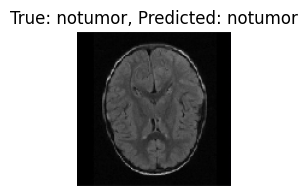

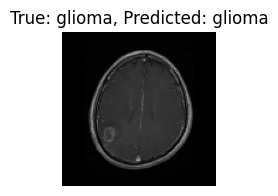

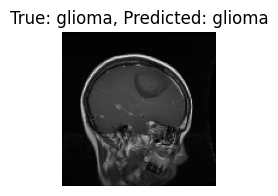

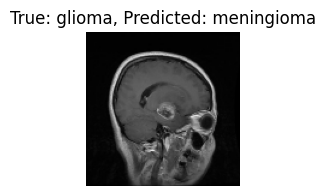

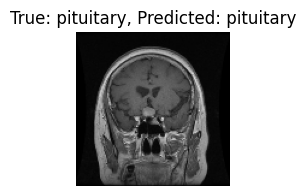

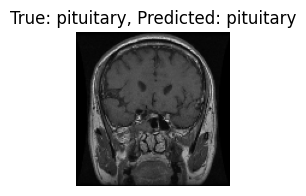

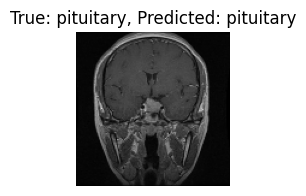

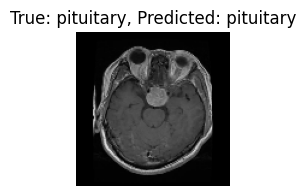

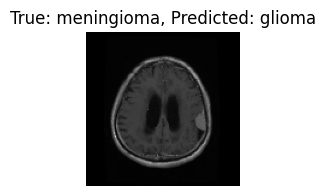

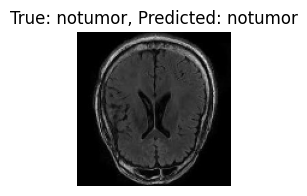

In [22]:
import matplotlib.pyplot as plt

# Bazı örnek görüntüleri görselleştirme
num_samples = 10
indices = np.random.choice(len(X_test), num_samples, replace=False)

for i, idx in enumerate(indices):
    img = X_test[idx]
    true_label = categories[y_true_classes[idx]]
    pred_label = categories[y_pred_classes[idx]]

    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.title(f"True: {true_label}, Predicted: {pred_label}")
    plt.axis('off')
    plt.show()
